# Exercise 1: Calculating the Z-Interval for a Mean

- Task: Write a function that calculates the confidence interval for a mean given a sample, a known population standard deviation, and a confidence level.

-  Input: A list of sample values, population standard deviation, and confidence level (e.g., 0.95).

- Output: A tuple representing the lower and upper bounds of the Z-interval.

Confidence Interval: 
$$Interval = (\bar{X}-Z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\bar{X}+Z_{\alpha/2}\frac{\sigma}{\sqrt{n}} )$$

In [ ]:
import scipy.stats as stats
import numpy as np
import math

def calculate_z_interval_for_mean(sample, pop_std, confidence_level):
    # calculate the sample mean
    x_bar = np.mean(sample)
    n = len(sample)

    # Find the z score 
    alpha = 1 - confidence_level
    area_z_alpha_half_to_inf = alpha/2
    area_neg_inf_to_z_alpha_half = 1 - area_z_alpha_half_to_inf
    z_alpha_half = stats.norm.ppf(area_neg_inf_to_z_alpha_half)
    
    # Calcualte the margin of error
    margin_of_error = z_alpha_half * pop_std / np.sqrt(n)

    # Get lower bound and upper bound
    lower_bound = x_bar - margin_of_error
    upper_bound = x_bar + margin_of_error
    return lower_bound, upper_bound


sample = [100, 102, 98, 101, 99, 100, 97]  # Example sample
pop_std_dev = 5                            # Known population standard deviation
confidence_level = 0.95  
lower_bound, upper_bound = calculate_z_interval_for_mean(sample, pop_std_dev, confidence_level)

print(f"Population Mean: {np.mean(sample)}")
print(f"{confidence_level * 100}% confidence interval: ({lower_bound},{upper_bound})")

Population Mean: 99.57142857142857
95.0% confidence interval: (95.86744479875983,103.2754123440973)


# Exercise 2: Simulating a Z-Interval for a Sample

-  Task: Generate a random sample from a normal distribution with a known mean and standard deviation, then calculate a 95% Z-interval for the mean of the sample.

- Input: Population mean, population standard deviation, sample size.

- Output: The Z-interval bounds and the sample mean.

- Hint: Use numpy.random.normal to generate the sample.

In [9]:
POP_MEAN = 5
POP_STD = 10
SAMPLE_SIZE = 1000
CONFIDENCE_LEVEL = 0.95

sample = np.random.normal(loc=POP_MEAN, scale=POP_STD, size=SAMPLE_SIZE)
lower_bound, upper_bound = calculate_z_interval_for_mean(sample, POP_STD, CONFIDENCE_LEVEL)

print(f"Population Mean: {POP_MEAN}")
print(f"{confidence_level * 100}% confidence interval: ({lower_bound},{upper_bound})")

Population Mean: 5
95.0% confidence interval: (4.388321754293398,5.627911818902521)


#   Exercise 3: Interpreting Confidence Intervals

- Task: Simulate 1000 random samples of a fixed size from a normal distribution with known mean and standard deviation, then calculate a confidence interval for each sample. Count how many of these intervals contain the true mean.

- Input: Population mean, population standard deviation, sample size, and confidence level.

-  Output: The percentage of intervals that contain the true mean.

- Hint: This exercise helps reinforce the interpretation of a confidence interval as capturing the true mean a certain percentage of the time.


In [14]:
SAMPLE_SIZE = 1000
NUM_SAMPLES = 1000
POP_MEAN = 5
POP_STD = 10
CONFIDENCE_LEVEL = 0.95
count = 0

for _ in range(NUM_SAMPLES):
    sample = np.random.normal(loc=POP_MEAN, scale=POP_STD, size=SAMPLE_SIZE)
    lower_bound, upper_bound = calculate_z_interval_for_mean(sample, POP_STD, CONFIDENCE_LEVEL)
    contains = lower_bound <= POP_MEAN and upper_bound >= POP_MEAN
    if contains:
        count += 1

print(f"{count}/{NUM_SAMPLES} intervals ({CONFIDENCE_LEVEL*100}%) contains the true population mean ")


949/1000 intervals (95.0%) contains the true population mean 


# Exercise 4: Effect of Sample Size on Interval Length

-  Task: Write a function that plots the length of the Z-interval for a mean as the sample size increases. Use a fixed population standard deviation and confidence level.

- Input: Range of sample sizes, population standard deviation, confidence level.

- Output: A plot showing sample size on the x-axis and interval length on the y-axis.

- Hint: The interval length is proportional to $ \frac{\sigma}{\sqrt{n}} $ 

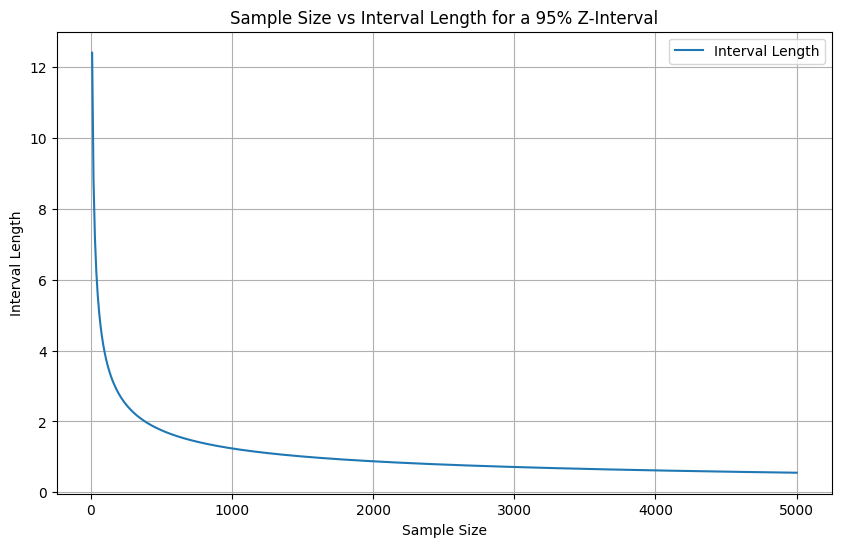

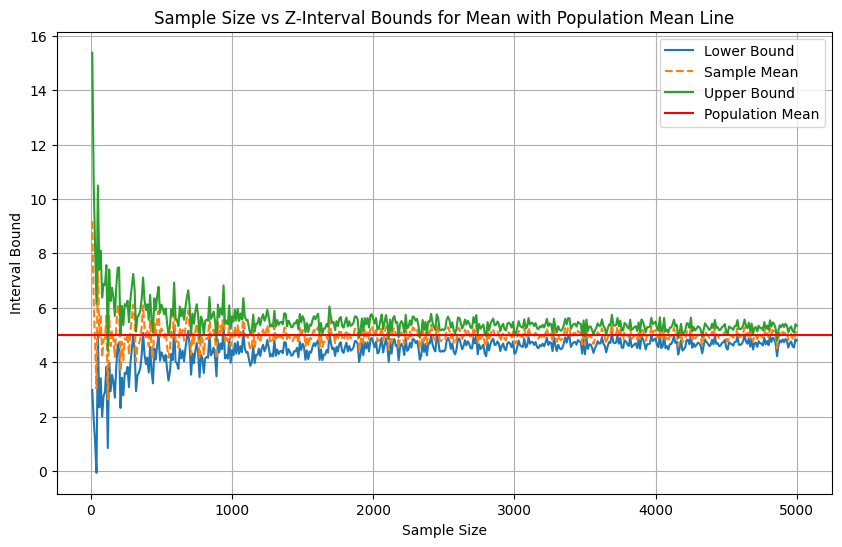

In [16]:
import matplotlib.pyplot as plt 

MAX_SAMPLE_SIZE = 5000
SAMPLE_SIZES = range(10, MAX_SAMPLE_SIZE + 1, 10)
POP_MEAN = 5
POP_STD = 10
CONFIDENCE_LEVEL = 0.95
interval_len_lis = []

lower_bounds, upper_bounds, sample_means = [], [], []

for sample_size in SAMPLE_SIZES:
    sample = np.random.normal(loc=POP_MEAN, scale=POP_STD, size=sample_size)
    lower_bound, upper_bound = calculate_z_interval_for_mean(sample, POP_STD, CONFIDENCE_LEVEL)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)
    sample_means.append(np.mean(sample))
    interval_len = upper_bound - lower_bound
    interval_len_lis.append(interval_len)
    
# Plot sample size vs interval length
plt.figure(figsize=(10, 6))
plt.plot(SAMPLE_SIZES, interval_len_lis, label='Interval Length')
plt.xlabel('Sample Size')
plt.ylabel('Interval Length')
plt.title('Sample Size vs Interval Length for a 95% Z-Interval')
plt.grid(True)
plt.legend()
plt.show()

# Plot the interval bounds and sample means with population mean line
plt.figure(figsize=(10, 6))
plt.plot(SAMPLE_SIZES, lower_bounds, label='Lower Bound')
plt.plot(SAMPLE_SIZES, sample_means, label='Sample Mean', linestyle='--')
plt.plot(SAMPLE_SIZES, upper_bounds, label='Upper Bound')
plt.axhline(y=POP_MEAN, color='red', linestyle='-', linewidth=1.5, label='Population Mean')
plt.xlabel('Sample Size')
plt.ylabel('Interval Bound')
plt.title('Sample Size vs Z-Interval Bounds for Mean with Population Mean Line')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 5: Calculating the t-Interval for a Mean
- Task: Write a function that calculates a t-interval for a mean given a sample, sample standard deviation, and confidence level.

- Input: A list of sample values, sample standard deviation, and confidence level.

- Output: A tuple representing the lower and upper bounds of the t-interval.

- Hint: Use scipy.stats.t.ppf to get the critical t-value.

The t-interval for the mean is 
$$(\bar{X}-t_{\alpha/2,n-1}* \frac{S}{\sqrt{n}}, \bar{X}+t_{\alpha/2,n-1}* \frac{S}{\sqrt{n}})$$

In [17]:
def calculate_t_interval_for_mean(sample, confidence_level):
    # Get t_alpha_half
    n = len(sample)
    alpha = 1 -confidence_level
    area_t_alpha_half_to_inf = alpha / 2
    area_neg_inf_to_t_alpha_half = 1 - area_t_alpha_half_to_inf
    t_alpha_half = stats.t.ppf(area_neg_inf_to_t_alpha_half, df=n-1)

    # Calculate margin of error
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    margin_of_error = t_alpha_half * s / np.sqrt(n)

    # Get lower bound and upper bound
    lower_bound = x_bar - margin_of_error
    upper_bound = x_bar + margin_of_error
    return lower_bound, upper_bound

def calculate_t_interval_scipy(sample, confidence_level):
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    n = len(sample)
    interval = stats.t.interval(confidence_level, df=n-1, loc=x_bar, scale=s/np.sqrt(n))
    return interval

sample = np.random.normal(10, 5, size=30)  # Example sample
confidence_level = 0.95

# Manual calculation
lower, upper = calculate_t_interval_for_mean(sample, confidence_level)
print(f"Manual Calculation: ({lower}, {upper})")

# Automatic calculation
scipy_interval = calculate_t_interval_scipy(sample, confidence_level)
print(f"SciPy Calculation: {scipy_interval}")


Manual Calculation: (6.550385313112944, 10.472502186468724)
SciPy Calculation: (np.float64(6.550385313112945), np.float64(10.472502186468724))


# Exercise 6: Comparing Z- and t-Intervals for Small Sample Sizes
- Task: Simulate small samples (e.g., n = 5, 10, 15) from a normal distribution and calculate both Z- and t-intervals for the mean of each sample. Compare the intervals.

-  Input: Population mean, population standard deviation, sample size, and confidence level.

- Output: Display both intervals for each sample size and discuss the difference.

- Hint: The t-interval should be wider than the Z-interval for small samples.

   Sample Size                                Z-Interval  \
0            5   (42.47848738752309, 48.511307113784255)   
1           10  (52.286903146971575, 56.552750885086816)   
2           15  (48.792978825910595, 52.276028918839955)   
3           20   (51.384184679668465, 54.40059454279904)   
4           25    (49.979189848887074, 52.6771488496714)   
5           30    (47.92604665308173, 50.38893499300451)   
6           35    (51.62894205514951, 53.90913358374547)   
7           40    (50.52638874836049, 52.65931261741811)   

                                 T-Interval  
0    (43.12167330259901, 47.86812119870834)  
1  (52.942923155574725, 55.896730876483666)  
2  (48.859694564781165, 52.209313179969385)  
3   (51.32537850090795, 54.459400721559554)  
4    (49.90648671763406, 52.74985198092441)  
5    (47.75883398783398, 50.55614765825226)  
6  (51.467473778354616, 54.070601860540364)  
7   (50.35521497701262, 52.830486388765976)  


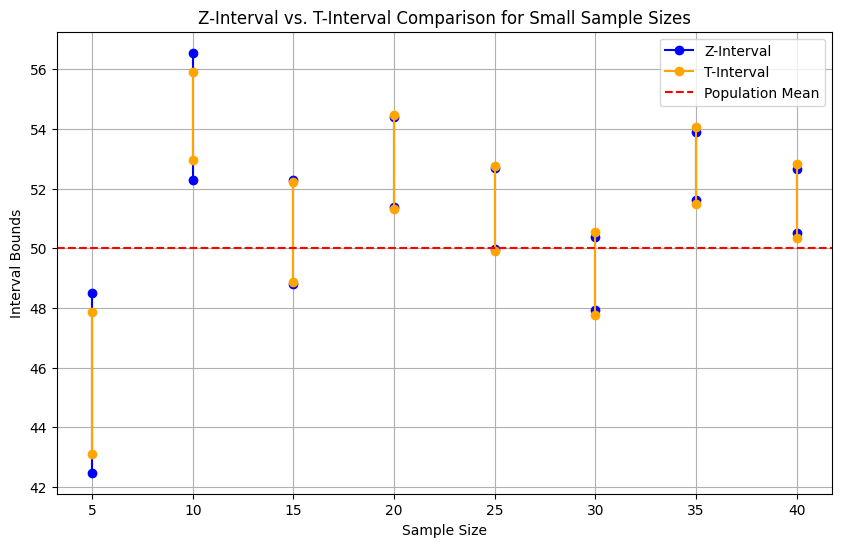

In [21]:
import pandas as pd


# Parameters
POP_MEAN = 50
POP_STD = 10
CONFIDENCE_LEVEL = 0.50
sample_sizes = [5, 10, 15, 20, 25, 30, 35, 40]

# Simulation and comparison of intervals
results = []

for sample_size in sample_sizes:
    # Generate sample
    sample = np.random.normal(loc=POP_MEAN, scale=POP_STD, size=sample_size)
    sample_mean = np.mean(sample)

    # Calculate Z-interval
    z_lower, z_upper = calculate_z_interval_for_mean(sample, POP_STD, CONFIDENCE_LEVEL)

    # Calculate T-interval
    t_lower, t_upper = calculate_t_interval_for_mean(sample, CONFIDENCE_LEVEL)

    # Store results
    results.append({
        "Sample Size": sample_size,
        "Z-Interval": (z_lower, z_upper),
        "T-Interval": (t_lower, t_upper)
    })

    # Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Visualization of Z- and T-intervals as an interval plot
plt.figure(figsize=(10, 6))

# Plot Z- and T-intervals for each sample size
for i, row in results_df.iterrows():
    sample_size = row['Sample Size']
    z_interval = row['Z-Interval']
    t_interval = row['T-Interval']
    
    # Plot Z-interval in blue
    plt.plot([sample_size, sample_size], z_interval, color='blue', marker='o', label='Z-Interval' if i == 0 else "")
    # Plot T-interval in orange
    plt.plot([sample_size, sample_size], t_interval, color='orange', marker='o', label='T-Interval' if i == 0 else "")

# Plot the population mean as a red horizontal line
plt.axhline(y=POP_MEAN, color='red', linestyle='--', linewidth=1.5, label='Population Mean')

# Labeling the plot
plt.xlabel('Sample Size')
plt.ylabel('Interval Bounds')
plt.title('Z-Interval vs. T-Interval Comparison for Small Sample Sizes')
plt.legend()
plt.grid(True)

# Exercise 7: Visualizing the Effect of Confidence Level on Interval Length

- Task: Write a function that plots the length of a t-interval for a mean as the confidence level changes (e.g., from 80% to 99%) for a fixed sample size.

- Input: Sample data, range of confidence levels.

- Output: A plot showing confidence level on the x-axis and interval length on the y-axis.

- Hint: Higher confidence levels lead to wider intervals.

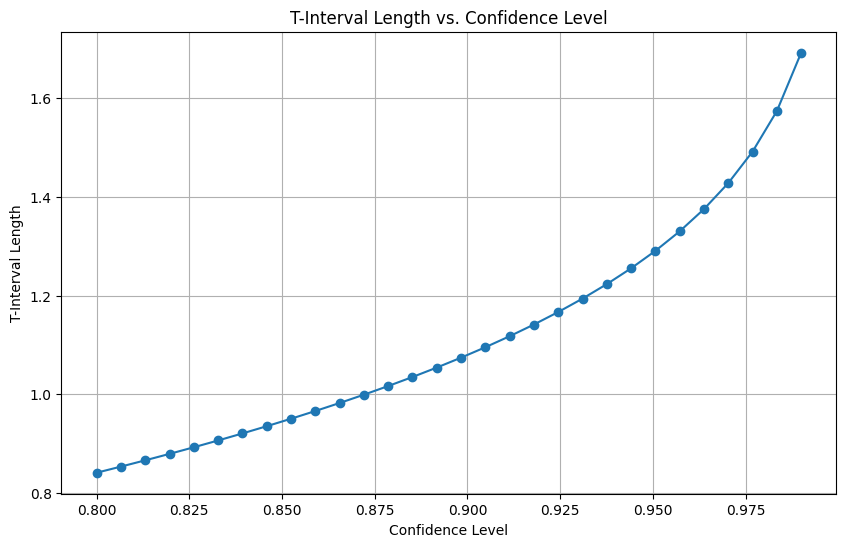

In [22]:
SAMPLE_SIZE = 1000
MAX_CONFIDENCE_LEVEL = 0.99
MIN_CONFIDENCE_LEVEL = 0.8  # Starting confidence level
NUM_POINTS = 30
confidence_level_lis = np.linspace(MIN_CONFIDENCE_LEVEL, MAX_CONFIDENCE_LEVEL, NUM_POINTS)
POP_MEAN = 50
POP_STD = 10
sample = np.random.normal(loc=POP_MEAN, scale=POP_STD, size=SAMPLE_SIZE)

interval_len_lis = []
for cl in confidence_level_lis:
    lower_bound, upper_bound = calculate_t_interval_for_mean(sample, cl)
    interval_len = upper_bound - lower_bound
    interval_len_lis.append(interval_len)

plt.figure(figsize=(10, 6))
plt.plot(confidence_level_lis, interval_len_lis, marker='o')
plt.xlabel('Confidence Level')
plt.ylabel('T-Interval Length')
plt.title('T-Interval Length vs. Confidence Level')
plt.grid(True)
plt.show()

# Exercise 8: Confidence Intervals with Non-Normal Data

- Task: Generate a sample from a non-normal distribution (e.g., exponential or uniform), and calculate the t-interval for the mean. Repeat this for several samples to examine if the intervals still contain the mean at the expected rate.

- Input: Distribution type (e.g., exponential), population mean, sample size, and confidence level.

- Output: The percentage of intervals that contain the true mean.

- Hint: This shows the robustness of the t-interval with non-normal data.

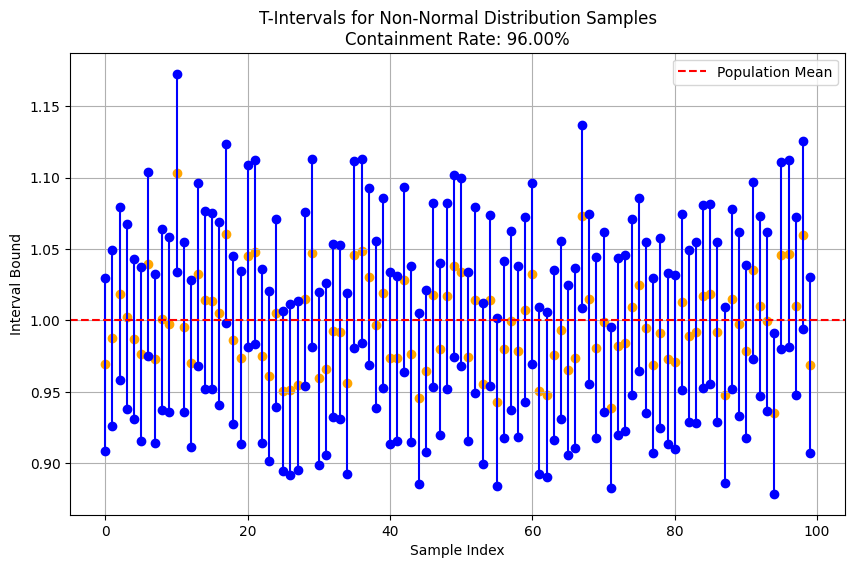

In [27]:
POP_MEAN = 1  # For exponential distribution, mean is 1/lambda; here we set lambda=1
CONFIDENCE_LEVEL = 0.95
NUM_SAMPLES = 100
SAMPLE_SIZE = 1000
intervals = []
contains_mean_count = 0


for _ in range(NUM_SAMPLES):
    sample = np.random.exponential(scale=1/POP_MEAN, size=SAMPLE_SIZE)
    lower_bound, upper_bound =  calculate_t_interval_for_mean(sample, CONFIDENCE_LEVEL)
    intervals.append((lower_bound, upper_bound, np.mean(sample)))

     # Check if the interval contains the population mean
    if lower_bound <= POP_MEAN <= upper_bound:
        contains_mean_count += 1

# Calculate the percentage of intervals containing the true mean
containment_rate = (contains_mean_count / NUM_SAMPLES) * 100

# Plot each interval with population mean line
plt.figure(figsize=(10, 6))
for i, (lower_bound, upper_bound, sample_mean) in enumerate(intervals):
    plt.plot([i, i], [lower_bound, upper_bound], color='blue', marker='o')
    plt.scatter(i, sample_mean, color='orange')  # Mark sample mean within each interval
plt.axhline(y=POP_MEAN, color='red', linestyle='--', linewidth=1.5, label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Interval Bound')
plt.title(f'T-Intervals for Non-Normal Distribution Samples\nContainment Rate: {containment_rate:.2f}%')
plt.legend()
plt.grid(True)
plt.show()

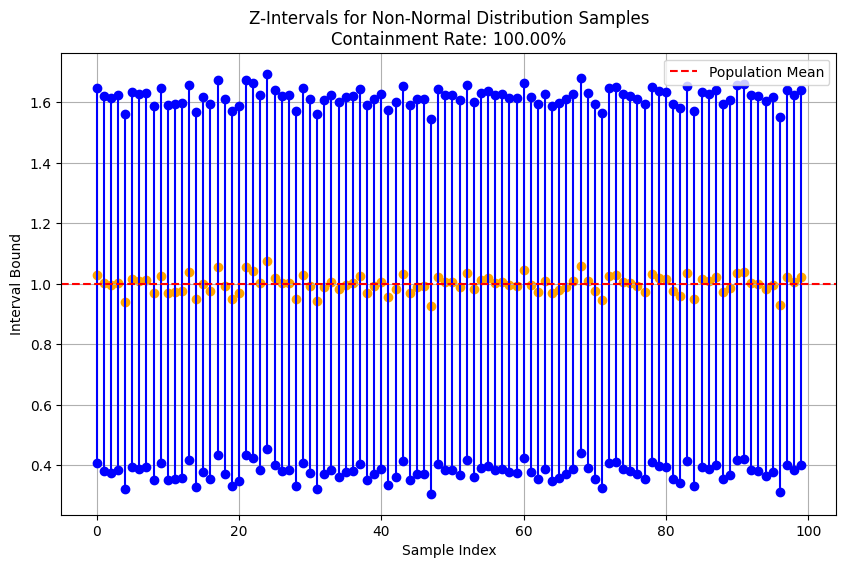

In [ ]:
POP_MEAN = 1  # For exponential distribution, mean is 1/lambda; here we set lambda=1
CONFIDENCE_LEVEL = 0.95
NUM_SAMPLES = 100
SAMPLE_SIZE = 1000
intervals = []
contains_mean_count = 0


for _ in range(NUM_SAMPLES):
    sample = np.random.exponential(scale=1/POP_MEAN, size=SAMPLE_SIZE)
    lower_bound, upper_bound =  calculate_z_interval_for_mean(sample, POP_STD, CONFIDENCE_LEVEL)
    intervals.append((lower_bound, upper_bound, np.mean(sample)))

     # Check if the interval contains the population mean
    if lower_bound <= POP_MEAN <= upper_bound:
        contains_mean_count += 1

# Calculate the percentage of intervals containing the true mean
containment_rate = (contains_mean_count / NUM_SAMPLES) * 100

# Plot each interval with population mean line
plt.figure(figsize=(10, 6))
for i, (lower_bound, upper_bound, sample_mean) in enumerate(intervals):
    plt.plot([i, i], [lower_bound, upper_bound], color='blue', marker='o')
    plt.scatter(i, sample_mean, color='orange')  # Mark sample mean within each interval
plt.axhline(y=POP_MEAN, color='red', linestyle='--', linewidth=1.5, label='Population Mean')
plt.xlabel('Sample Index')
plt.ylabel('Interval Bound')
plt.title(f'Z-Intervals for Non-Normal Distribution Samples\nContainment Rate: {containment_rate:.2f}%')
plt.legend()
plt.grid(True)
plt.show()

For non-normal data
- T-intervals are narrower than Z-intervals generally. 

- The containment rate of the population mean for the T-interval is 95% which aligns with the expected confidence level. The containment rate for the Z-interval is 100%, meaning all intervals contain the true mean. This indicates that Z-intervals are overly conservative when it comes to non-normal data, often producing intervals that are much wider than necessary. 

- T-intervals are more adaptable to non-normal distributions, as they account for sample variability and use the sample standard deviation. Z-intervals assume a normal distribution and known population standard deviation. When applied to non-normal data, they become overly wide to maintain the expected containment rate, making them less efficient in terms of interval length.
